# Applied Statistics Assignment

**Author:** Marcella Morgan
**Image Credit:** Images generated with the help of ChatGPT (OpenAI).

![Lady tasting tea + normal curve](images/lady_drinking_tea.png)


## Introduction 

This project uses simulation to explore several core ideas in statistical inference and hypothesis testing. The emphasis is on generating data, running repeated experiments, and interpreting the behaviour of common statistical tests.

The work is organised into four related problems:

**Lady Tasting Tea:**
The classic Lady Tasting Tea experiment is extended from 8 to 12 cups. A simulation approach is used to estimate the probability of correctly identifying all cups by chance and to compare this with the original experimental setup.

**Normal Distribution:**
A large number of small samples are drawn from a standard normal distribution. For each sample, the standard deviation is calculated using both the population formula (ddof=0) and the sample correction (ddof=1). The resulting distributions are compared visually to examine bias and the effect of increasing sample size.

**t-Tests and Type II Errors:**
Independent samples t-tests are simulated while varying the true difference in means between two groups. The proportion of times the null hypothesis is not rejected is recorded to examine how the Type II error rate changes as the effect size increases.

**ANOVA vs t-Tests:**
Three groups with different means are generated and analysed using both a one-way ANOVA and multiple pairwise t-tests. The results are compared to illustrate why ANOVA is preferred when testing differences across more than two groups.

Overall, the project demonstrates how simulation can be used to understand the behaviour and limitations of statistical tests, and how choices around sample size, effect size, and testing strategy affect statistical conclusions.


## Libraries

In [16]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Data frames.
import pandas as pd


## Problem 1: Lady Testing Tea

[Fisher’s Lady Tasting Tea](https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786) shows how hypothesis testing is used as a method for distinguishing random variation from meaningful patterns in data. A number of cups are prepared using two different pouring orders, milk-first and tea-first, and the participant is asked to sort the cups based on how they think they were made. 

Fisher used the [null hypothesis](https://www.investopedia.com/terms/n/null_hypothesis.asp) where it is assumed that the participant has no ability to tell whether tea or milk were poured first when making tea. It assumes that if the lady chooses the right cup it is becasue of random chance. So rather than testing the claim of superior tea-tasting ability directly, the experiment evaluates whether the observed pattern of results is plausibly explained by guessing, i.e. random chance. 

Fisher’s approach reverses everyday intuition. Rather than treating human action as predictable and chance as chaotic, it treats randomness as the stable, predictable reference point. Human action is messy and variable. Randomness, paradoxically, is what we can model reliably. When a result doesn't fit into the pattern of chance, it suggests that something other than chance might be responsible.

We can replicte how Fisher calculated the probability that the null hypothesis is correct. If the cups are being chosen by pure chance, then there is a one in the number of ways 4 cups can be chosen from 8 cups chance that all four cups will be chosen correctly. 

We can use ```math.comb```[(link)](https://docs.python.org/3/library/math.html#math.comb) to work out how many ways 4 cups can be chosen from 8 cups.

In [2]:
n_total = 8    # total number of cups
n_tea = 4      # number of tea-first cups 

total_guesses = math.comb(n_total, n_tea) # this does the same thing as the choose function on the calculator
total_guesses

70

So we can say there is a 1 in 70 chance that four correct cups could be chosen at random. Here we are assuming the stability of chance. Without any other interference, chance will choose the right cups one out of every 70 times.

We can turn this into a value by dividing 1 by 70 and we get what is called the [p-value](https://www.dummies.com/article/academics-the-arts/math/statistics/what-a-p-value-tells-you-about-statistical-data-169734/) The p-value represents the probability of obtaining the results observed if the null hypothesis were true. A small p-value indicates that the observed pattern would be unlikely to occur under random variation alone, providing evidence that something other than chance may be influencing the outcome.

In [3]:
p_value_8_cups = 1 / total_guesses
p_value_8_cups

0.014285714285714285

[Fisher set the p-value significance](https://pmc.ncbi.nlm.nih.gov/articles/PMC10435778/) at 0.05. This formalised the decision to accept or reject the null hypothesis. We can reject the null hypothesis if the p-value is under 0.05. The p-value for the Lady Tasting Tea experiment is 0.01 which means that choosing the correct 4 cups by chance is very unlikely, which means that something else must be going on, that the lady really can tell the difference.

Although the probability of choosing all the correct cups can be computed exactly using combinations, the same result can be estimated by simulation by repeatedly sampling 4 cups from the set of all 8 cups assuming the null hypothesis that the cups are being chosen by chance.

This can be done using ```np.random.choice```[link](https://numpy.org/devdocs/reference/random/generated/numpy.random.choice.html), which will simply choose 4 values from a set of 8. But when we do this 100000 times and count the successes, we can then divde by the number of simulations to get the percentage of correct guesses and this will serve as our estimated probability.

In [4]:
def ltt_simulation(total, size, n_simulations):

    successes = 0 # Starting success counter at 0
    true_set = {0, 1, 2, 3}# arbitarily setting these cups as the correct guesses
    correct_counts = [] # setting up the dataset for correct counts
    
    for _ in range(n_simulations):
        # np.random simulates choosing 4 cups by guessing
        guess = np.random.choice(total, size, replace=False) #replace=false means only unique values chosen

        # this is to count the number of correct cups in each shuffle to look at the distribution later.
        correct = len(set(guess).intersection(true_set)) #comparing all guess cups to all true_set cups
        correct_counts.append(correct) # and adding correct cups guesses to correct counts dataset
        
        # check success and adding successful guesses to the success counter
        if set(guess) == true_set: 
            successes += 1

    # Estimate probability
    estimated_probability = successes / n_simulations
    
    return estimated_probability, correct_counts
 
estimated_probability, correct_counts = ltt_simulation(8,4,100000)
print(estimated_probability)


0.01424


So we get a similar value to the p-value computed using combinations. But this value will change slighly everytime we run the experiment.

In the original 8-cup experiment, the probability of correctly identifying all cups by chance is low, but not lotto-level low. A p-value of around 0.015 already provides evidence against the null hypothesis, but it also reflects the fact that the total number of possible arrangements is still limited. Intuitively, as the number of cups increases, the number of possible ways to choose correctly grows rapidly, making a perfect guess much less likely. This means that the same level of performance becomes stronger evidence against chance when there are more cups involved. Extending the experiment to 12 cups makes the guessing problem harder and provides a more stringent test of the original claim.

So lets make it harder for the lady by preparing 12 cups of tea (8 tea-first and 4 milk-first) for her to choose 4 from. 

In [5]:
estimated_probability, correct_counts = ltt_simulation(12,4,100000)
print(estimated_probability)

0.00199


A p-value of 0.002 is small compared to the 0.015 p-value of the original 8-cup experiment, reflecting the much larger number of possible arrangements when more cups are involved. This shows that achieving a perfect result by guessing becomes increasingly unlikely as the experiment scales up. The test is made more stringent.

This affects the meaning of the p-value in the sense that extending the experiment to include more cups makes a correct result by chance much less likely, meaning the same p-value represents stronger evidence against the null hypothesis than in the original design. 

So if you wanted the p-value to be consistent with the previous 8 cup experiment, you would need to relax the p-value by making it higher. On the other hand if you were concerned about false positives the change in the structure of the experiment has the same effect as lowering the p-value so you would not need to change it. Though one good reason you might want to tighten the p-value would be if you didn't particularly like Mrs. Bristol and wanted to embarrass her when she was doing her tea tasting party trick.

## Problem 2: Normal Distribution

Another example of chance creating predictable patterns is the [bimonial distribution](https://www.datacamp.com/tutorial/binomial-distribution) of the number of cups guessed correctly in the above simulation. A binomial distribution describes the outcomes of a process where a fixed number of trials are performed and each trial has only two possible outcomes, such as success or failure. In the Lady Tasting Tea experiment, each cup can be classified correctly or incorrectly, and the total number of correct classifications varies from one trial of the experiment to another. 

We can plot this binomial distribution using the ```correct_counts``` value when we run the lady tasting tea simulation.

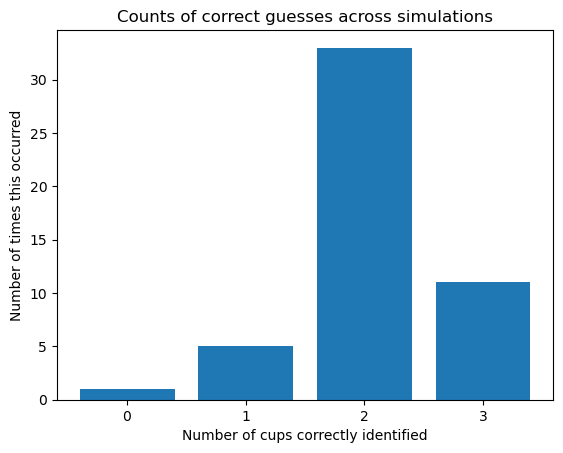

In [6]:
estimated_probability, correct_counts = ltt_simulation(8,4,50)

# Here the unique function counts up how many times 0 or 1 or 2 or 3 or 4 cups were chosen.  
values, counts = np.unique(correct_counts, return_counts=True)

# plotting
plt.bar(values, counts)
plt.xticks(values)
plt.xlabel("Number of cups correctly identified")
plt.ylabel("Number of times this occurred")
plt.title("Counts of correct guesses across simulations")
plt.show()



Let's increase the number of simulations and see what happens. 

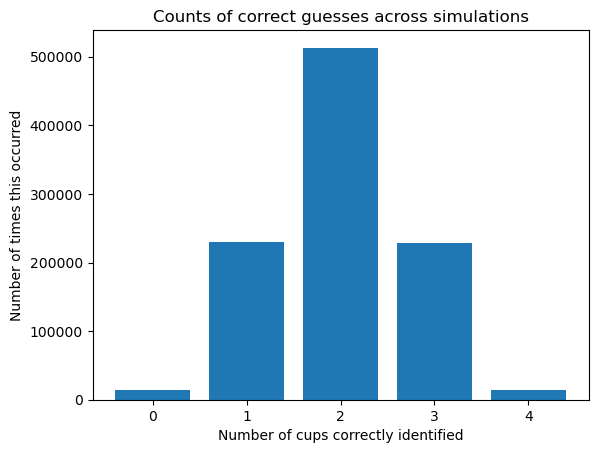

In [7]:
estimated_probability, correct_counts = ltt_simulation(8,4,1000000)
values, counts = np.unique(correct_counts, return_counts=True)

plt.bar(values, counts)
plt.xticks(values)
plt.xlabel("Number of cups correctly identified")
plt.ylabel("Number of times this occurred")
plt.title("Counts of correct guesses across simulations")
plt.show()

The plot starts to look more symmetrical and you see less variation each time the ltt_simulation function is run. The binomial distribution looks more like a [normal distribution](https://www.datacamp.com/blog/standard-normal-distribution) as the number of trials increases because many independent random effects are being added together. This makes the distribution smoother and more bell-shaped. This smoothing effect is described by the [Central Limit Theorem](https://www.datacamp.com/tutorial/central-limit-theorem).

A normal distribution is a continuous, symmetric probability distribution centered around its mean, where most values cluster near the average and extreme values are increasingly rare. A normal distribution is fully characterised by its mean and standard deviation because these two values completely determine its shape and spread. A [standard normal distribution](https://www.geeksforgeeks.org/maths/standard-normal-distribution/) is a normal distribution with mean 0 and standard deviation 1.

The normal distribution is useful not because everything is normally distributed, but because randomness, when aggregated, tends to produce normal-like behaviour in a predictable way.

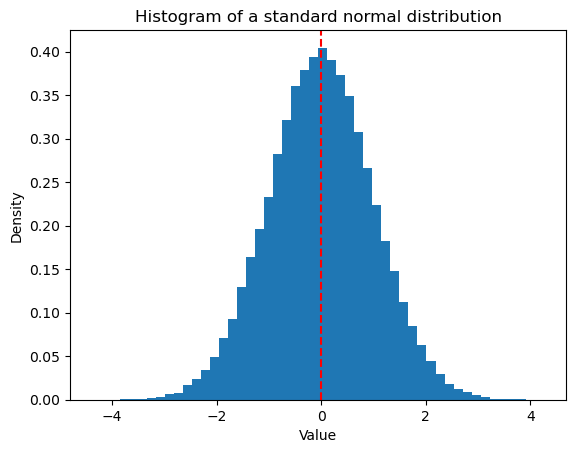

In [8]:
data = np.random.normal(loc=0, scale=1, size=100_000)

plt.hist(data, bins=50, density=True)
plt.axvline(np.mean(data), color="red", linestyle="--")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of a standard normal distribution")
plt.show()

The standard deviation measures how far values typically deviate from the mean, providing a measure of the spread of the data. There are [two commonly used formulas for calculating](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review) the standard deviation because they apply to different situations. When the entire population is available and the true mean is known, the population standard deviation (ddof = 0) can be used. When only a sample is available and the mean is estimated from the data, the sample standard deviation (ddof = 1) is used to correct for the bias introduced by estimating the mean. This correction makes the sample standard deviation a more accurate estimate of the true population variability, particularly for small sample sizes.

We can see how population and sample deviation differ by taking many small samples from a known normal distribution and calculating the standard deviation for each sample using both ddof = 0 and ddof = 1 and then plotting them as overlapping histograms.

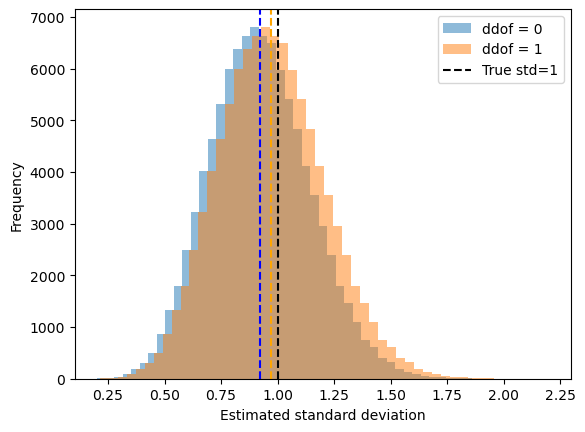

In [9]:
def SD_simulation(n, n_sim):
# n_sim = how many times we take a sample and get its std
# n = how many samples we take each time

# setting up the two data sets we'll be comparing
    sd0 = []
    sd1 = []

    for _ in range(n_sim):
        sample = np.random.normal(0, 1, n) # our normal distribution population with std of 1
        sd0.append(np.std(sample, ddof=0)) # estimating sample SD with no correction and adding to sd0
        sd1.append(np.std(sample, ddof=1)) # estimating sample SD with correction and adding to sd1
    

    # plotting
    plt.hist(sd0, bins=50, alpha=0.5, label="ddof = 0")
    plt.hist(sd1, bins=50, alpha=0.5, label="ddof = 1")
    plt.axvline(np.mean(sd0), color="blue", linestyle="--") 
    plt.axvline(np.mean(sd1), color="orange", linestyle="--")
    plt.axvline(1, color="black", linestyle="--", label="True std=1")# puts line at the mean for the true std

    plt.xlabel("Estimated standard deviation")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

SD_simulation (10, 100000)

The blue line shows the mean of the standard deviation calculated using the population formula, which is further from the true standard deviation of 1. The orange line shows the mean of the corrected standard deviation, which still has some error but is closer to the true value. 

What happens when we increase the nubmer of samples we take?

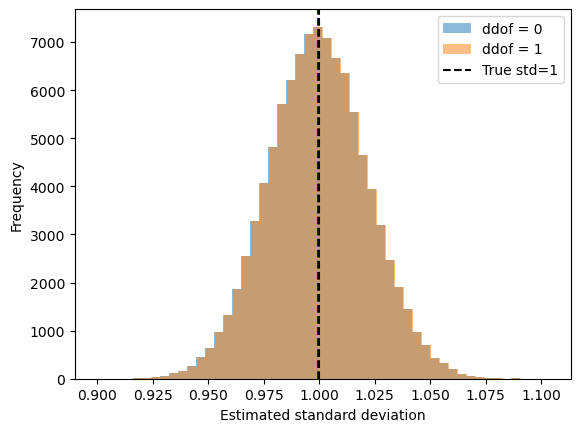

In [10]:
SD_simulation (1000, 100000)

As the number of samples increases, the two histograms converge and their standard deviations line up. As sample size increases, the effect of estimating the mean diminishes, causing the standard deviation estimates computed with and without the correction to converge.
 
Although these histograms have a bell-shaped appearance, they are not normal distributions in the strict sense. A common mistake is to assume that any distribution that looks like a bell curve is a standard normal distribution. In this case, the plots show the distribution of estimated standard deviations across many repeated samples, not the normal distribution of the original data itself. Many random processes produce smooth, bell-shaped patterns when repeated often, but this does not mean they follow a standard normal distribution with mean 0 and standard deviation 1. The similarity in shape can be misleading, and it highlights the difference between something that looks approximately normal and a distribution that is formally defined as normal.

## Problem 3: t-Tests and Type II Errors

Sample size plays a crucial role in statistical analysis. Increasing the number of trials in the Lady Tasting Tea experiment smooths the binomial distribution, making it increasingly resemble a normal distribution. Similarly, increasing the sample size reduces the variability and bias in estimates of the standard deviation. Sample size also affects the reliability of hypothesis tests, such as t-tests, where larger samples increase the ability to detect true differences between groups.

[t-Tests](https://towardsdatascience.com/t-test-and-hypothesis-testing-explained-simply-1cff6358633e/) determine if the difference in the means of 2 groups is likely to be due to random variation or reflects a real difference between the populations. It compares the difference in means to the variability within the samples and produces a p-value indicating how likely such a difference would be if there was no causal factor involved.

Lets do a t-test simulation on our 2 standard deviation groups from problem 2. The null hypothesis for this t-test is that the two groups have equal means, meaning any observed difference between the sample means is due to random variation. We're going to use ```stats.ttest_ind```[link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to run the t_test 100000 times.

In [18]:
# setting up our datasets
sd0=[]
sd1=[]

# making our datasets
for _ in range(100000):
    sample = np.random.normal(0, 1, 10) # our normal distribution population with std of 1
    sd0.append(np.std(sample, ddof=0)) # estimating sample SD with no correction and adding to sd0
    sd1.append(np.std(sample, ddof=1)) # estimating sample SD with correction and adding to sd1

# running the t-test
stats.ttest_ind(sd0, sd1)

TtestResult(statistic=-49.39135260307628, pvalue=0.0, df=199998.0)

The p-value is basically 0. There is a very very low probabilty that the null hypotheis is true. We can conclude that there is strong evidence of a systematic difference between the group means, which is consistent with how we constructed the two datasets.

t-Tests help to see through the noise of variance in the data. But they work better with large datasets, often failing to catch patterns with small sample sets. When the sample is too small there is more chance of getting [Type II errors](https://www.investopedia.com/terms/t/type-ii-error.asp), which are essentially false negatives. t-Tests can reutrn a p-value that is high enough that the null hypothesis is not rejected, even when the null hypothesis is false.

Lets do the above t-test with a much smaller sample.

In [12]:
sd0=[]
sd1=[]

for _ in range(100): # reduce to collecting 100 standard deviations
    sample = np.random.normal(0, 1,10)
    sd0.append(np.std(sample, ddof=0))
    sd1.append(np.std(sample, ddof=1)) 

stats.ttest_ind(sd0, sd1)

TtestResult(statistic=-1.3969619919865675, pvalue=0.1639886806872673, df=198.0)

The p-value is above the 0.05 significance level and so the null hypothesis that there is no difference in mean cannot be rejected. We know that there is a difference in mean becasue we set the datasets up that way. So the t-test is of no use here. It tells us nothing.

t-Tests can also return type II errors when the means of the 2 datasets are too similar. Below is a simulation that shows that type II errors increase as difference between means decrease. 

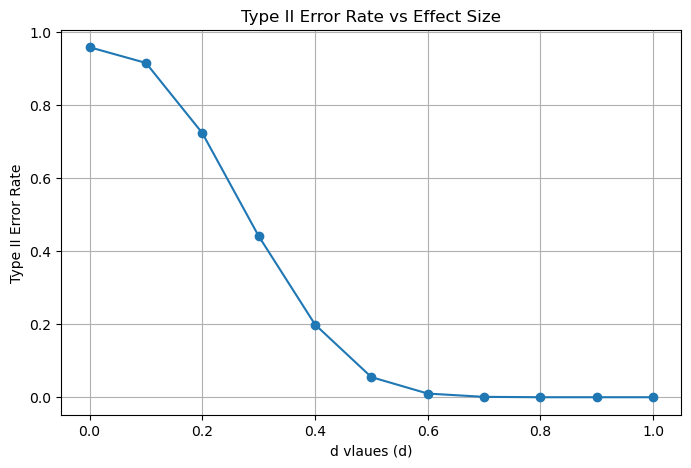

In [19]:
def ttest_simulation(cutoff):

        n = 1000 # number of simmulations
        sample_size = 100 # nubmer of samples taken in each simulations
        cutoff # significance level of the pvalue. Lower than this and the null hypothesis is rejected.
        type2_errors = []  # setting up error dataset

        d_values = np.round(np.arange(0, 1.01, 0.1), 1) # generates mean differences from 0 to 1 in steps of 0.1, with rounding to avoid floating point issues.

        for d in d_values:
            errors = 0 # starting errors at 0

            for _ in range(n): #running simulation
                
                # drawing samples from a normal distirbution with a mean of 0 - this will remain the same through the simulation.
                group1 = np.random.normal(loc=0, scale=1, size=sample_size)
                # drawing samples from a normal distribution with a mean taken from the d_values list. This changes through the simulation.
                group2 = np.random.normal(loc=d, scale=1, size=sample_size)

                # doing the t-test
                t_stat, p_value = stats.ttest_ind(group1, group2)

            # adding t-tests that return type II errors to error list so they can be counted
                if p_value > cutoff:
                    errors += 1

            # Converting the count to a percentage so Type II error results can be compared across simulations.
            type2_rate = errors / n
            type2_errors.append(type2_rate)

        # ---- Plotting ---- #
        plt.figure(figsize=(8, 5))
        plt.plot(d_values, type2_errors, marker='o')
        plt.xlabel("d vlaues (d)")
        plt.ylabel("Type II Error Rate")
        plt.title("Type II Error Rate vs Effect Size")
        plt.grid(True)
        plt.show()

ttest_simulation(0.05)


The graphs shows clearly that the Type II error rate decreases as the difference in means increases, showing that the t-test becomes more reliable when the effect size is larger. When the mean difference is small, the two distributions overlap heavily and the test often fails to detect the difference, resulting in a high rate of false negatives. The smooth, gradual decline in the curve highlights that t-tests do not have a sharp cutoff in detecting a differnce in means, but instead they improve gradually as the difference between group means increases.

When the mean difference is zero (d vlaue =0), the null hypothesis is true, so the test should not reject it. It is interesting that the Type II error rate is not 100% when d=0. This means that there are some false positives and that the null hypothesis was rejected when it shouldn't have been. This is a [Type I](https://www.statsig.com/perspectives/why-type-one-error-matters) error and these occur because the test is run at a p-value of 0.05 or a 5% significance level, meaning that some false postives are allowed.

Lets reduce the significance level to see what happens.

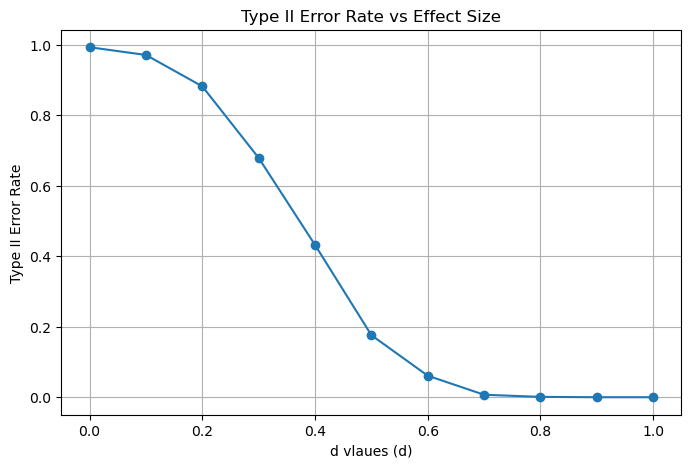

In [21]:
ttest_simulation(0.01)

Reducing the significance level to 0.01 puts d=0 much closer to 100%. So why don't we just do that all the time then? The problem is that decreasing the significance level increases the incidences of Type II errors. This can be seen in the above graph clearly at d=0.6 and d=0.4 when compared with where the line is at d=0.6 and d=0.4 in the first graph. 

## Problem 4: ANOVA vs t-Tests

This leads to another issue with t-tests. When many t-tests are run, each test has its own chance of producing a false positive (Type I error). Even if all the null hypotheses are true, a test run at a significance level of 0.05 has a 5% chance of rejecting the null by chance alone. As more tests are performed, the probability that at least one false positive occurs increases. This effect is known as inflation of the Type I error rate, or [familywise](https://www.theanalysisfactor.com/family-wise-error-rate/) error.

[ANOVA](https://www.geeksforgeeks.org/data-science/difference-between-t-test-and-anova/) is one way to aovid these errors. ANOVA tests all group means at once and uses one p-value, not many. Because there is only one hypothesis test, the overall Type I error rate stays at the chosen significance level (e.g. 0.05).

In the simulation below we are going to compare the results of an ANOVA test with the results of multiple independent t-tests to see how they differ.

In [49]:
# generating the 3 sample groups. They all have the same SD and sample size but differ in their means.
group1 = np.random.normal(loc=0.0, scale=1, size=30)
group2 = np.random.normal(loc=0.5, scale=1, size=30)
group3 = np.random.normal(loc=1.0, scale=1, size=30)

groups = [group1, group2, group3]

# Checking means and std
print(np.mean(group1), np.mean(group2), np.mean(group3))
print(np.std(group1), np.std(group2), np.std(group3))



0.03542991414147109 0.571458726844238 0.7812045844555945
0.8360667914546202 0.9005824416785907 1.0083092810587326


Running a one-way ANOVA test using ```stat.f_oneway```[link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). We are assuming the null hypothesis that the means of all three groups are the same.

In [50]:
from scipy import stats
# running ANOVA test
F_stat, p_value = stats.f_oneway(group1, group2, group3)

print("F statistic:", F_stat)
print("p-value:", p_value)

# setting sigificant pvalue
alpha = 0.05

if p_value < alpha:
    print("Reject H0: at least one group mean is different")
else:
    print("Fail to reject H0: no evidence of a difference in means")


F statistic: 5.093017312583026
p-value: 0.00809691299221737
Reject H0: at least one group mean is different


The test rejected the null hypothesis that the groups had the same mean. We know this is correct because we know the means were all different. 

Now we can compare this result to the reuslt we get from running 3 separate t-tests that compare all three groups to each other. 

In [52]:
group12 = stats.ttest_ind(group1, group2)
group13 = stats.ttest_ind(group1, group3)
group23 = stats.ttest_ind(group2, group3)

print("1 vs 2 p-value:", group12.pvalue)
print("1 vs 3 p-value:", group13.pvalue)
print("2 vs 3 p-value:", group23.pvalue)


1 vs 2 p-value: 0.02224969052996471
1 vs 3 p-value: 0.0032909307859816856
2 vs 3 p-value: 0.40687655314930204


Although the groups were generated with different means, the pairwise t-tests do not consistently detect all of these differences. In some comparisons, the null hypothesis is rejected, providing evidence of a difference in means, while in others the null hypothesis is not rejected despite a true difference being present. These non-significant results are type II false negatives, arising from sampling variability and limited statistical power. Although no single test is repeated or reused, each test provides an additional opportunity for a false rejection of the null hypothesis. Also, as the number of tests increases, the chance of observing at least one statistically significant result purely by random variation also increases, leading to an accumulation of Type I error across the set of comparisons.

In contrast, one-way ANOVA evaluates all group means simultaneously and so maintains control over the overall Type I error rate. A significant ANOVA result indicates that at least one group differs from the others without inflating the false positive rate, regardless of how many groups are included.

## Conclusion

In this project, simulation was used to explore how statistical tests behave under randomness and uncertainty. The Lady Tasting Tea experiment showed how probability and the null hypothesis can be used to judge whether an observed result is likely to occur by chance, and how increasing the number of possible outcomes makes correct guessing less likely. Examining distributions highlighted how repeated random processes produce predictable patterns, such as binomial and normal distributions, and how increasing sample size improves the stability of estimates like the standard deviation. The t-test simulations demonstrated how both effect size and sample size influence the likelihood of detecting real differences, and how Type II errors decrease as differences become larger. Finally, the ANOVA example showed why a single global test is preferred over multiple t-tests when comparing several groups, as it controls the overall error rate more effectively. Overall, the project illustrates that statistical tests are not perfectly accurate but provide structured ways to reason about uncertainty, chance, and evidence in data.


Incidentally, it is absolutley possible to tell if milk has been added before or after tea. [This reddit post](https://www.reddit.com/r/askscience/comments/1bqu33/why_does_tea_taste_different_when_adding_the_milk) explains why tea-first causes more denaturing of milk proteins which can change the taste of the milk. And also if the tea is made with a tea bag, the flavour components are more drawn out by the surfactancy of the milk when it comes into contact with the leaves. The only way anyone should be making tea is to add the tea bag to the milk letting it infuse as the kettle boils. Then pour in boiling water on top of milk infusion. The tea bag should be left in the cup while drinking the tea.

## References

See README

# END